In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pytz
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Print available fonts
fonts = fm.findSystemFonts(fontpaths=None, fontext='ttf')
for font in fonts:
    print(font)
# Imposta tutti i font a 12
plt.rcParams.update({'font.size': 12, 'font.family': 'DejaVuSerif'})
# Impostiamo Pandas per stampare tutte le righe e tutte le colonne
pd.set_option('display.max_rows', None)  # Mostra tutte le righe
pd.set_option('display.max_columns', None)  # Mostra tutte le colonne
pd.set_option('display.width', None)  # Rimuove il limite di larghezza della visualizzazione
pd.set_option('display.max_colwidth', None)  # Mostra il contenuto completo delle celle

/usr/share/fonts/truetype/dejavu/DejaVuSansCondensed.ttf
/usr/share/fonts/truetype/dejavu/DejaVuSansCondensed-BoldOblique.ttf
/usr/share/fonts/truetype/dejavu/DejaVuSerif-Italic.ttf
/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf
/usr/share/fonts/truetype/dejavu/DejaVuSans-ExtraLight.ttf
/usr/share/fonts/truetype/dejavu/DejaVuSansCondensed-Oblique.ttf
/usr/share/fonts/truetype/dejavu/DejaVuSansCondensed-Bold.ttf
/usr/share/fonts/truetype/dejavu/DejaVuSansMono-Bold.ttf
/usr/share/fonts/truetype/dejavu/DejaVuSerifCondensed.ttf
/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf
/usr/share/fonts/truetype/dejavu/DejaVuMathTeXGyre.ttf
/usr/share/fonts/truetype/dejavu/DejaVuSerifCondensed-BoldItalic.ttf
/usr/share/fonts/truetype/dejavu/DejaVuSerifCondensed-Italic.ttf
/usr/share/fonts/truetype/dejavu/DejaVuSerif.ttf
/usr/share/fonts/truetype/dejavu/DejaVuSans-BoldOblique.ttf
/usr/share/fonts/truetype/dejavu/DejaVuSerif-Bold.ttf
/usr/share/fonts/truetype/dejavu/DejaVuSans-Oblique.ttf
/usr/sha

In [1]:
import matplotlib.dates as mdates
from math import log
import matplotlib.dates as mdates

def plot_opt_obs(scenario, df2, ax, legend_elements, y_min, y_max):
    # Crea una copia profonda per evitare il SettingWithCopyWarning
    df = df2.copy(deep=True)
    df = df.drop_duplicates(["timestamp","scenario_id"])
    df.sort_values(by=["timestamp"], inplace=True)
    df["timestamp"] = df["timestamp"].apply(lambda x: datetime.fromtimestamp(x))

    # Plot delle curve ottimali e osservate sul primo asse Y
    line1, = ax.plot(df["timestamp"], df["opt_avg"], label='Optimal', linestyle='--', color ='C8')
    line2, = ax.plot(df["timestamp"], df["obs_avg"], label='Simulated', color='C0')

    # Definisci l'intervallo sull'asse x convertendo le date in numeri
    x_start = mdates.date2num(df["timestamp"].min())  # Converte la data di inizio
    x_end = mdates.date2num(df["timestamp"].max())    # Converte la data di fine

    # line3 = ax.axhline(y=log(300), label='-300 cbar', color='C1', linestyle='--')
    line4 = ax.axhline(y=log(20), label='-20 cbar', color='C9', linestyle='--')
    line5 = ax.axhline(y=log(1500), label='-1500 cbar', color='C3', linestyle='--')
    # Imposta etichette e titolo per il primo asse Y
    ax.set_xlabel('Date')
    ax.set_ylabel('Average Moisture Level')
    ax.set_title(f"{scenario}")
    ax.set_ylim([log(10), log(2000)])
    ax.tick_params(axis='y')
    # Ruota i tick dell'asse X di 45 gradi
    ax.tick_params(axis='x', rotation=90)
    # Imposta i tick esplicitamente sull'asse X per ogni timestamp
    ax.set_xticks(df["timestamp"])
    # Usa un DateFormatter per formattare la data sull'asse X
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))  # Personalizza il formato della data
    # Crea un secondo asse Y per df["delta"] con visualizzazione a barre
    ax2 = ax.twinx()
    # Bar width for grouped bars
    bar_width, offset = 0.3, 3.6
    # Plot bars side by side
    bars = ax2.bar(df["timestamp"] - pd.Timedelta(hours=offset), df["delta"], bar_width, label='Irrigation', color='green', alpha=0.5)
    pluv_bars = ax2.bar(df["timestamp"] + pd.Timedelta(hours=offset), df["daily_pluv"], bar_width, label='Pluv', color='red', alpha=0.5)
    df[df["daily_pluv"] > 20].apply(lambda dff: ax2.text(dff["timestamp"] + pd.Timedelta(hours=offset), 19.2, dff["daily_pluv"], color='black', ha='center'), axis=1)

    # Imposta etichette e parametri per il secondo asse Y
    ax2.set_ylabel('Liters')
    ax2.tick_params(axis='y')
    ax2.set_ylim([0, 20])

    # Aggiungi le linee alla lista della legenda se non sono già presenti
    for line in [line1, line2, line4, line5]:  #line3, 
        if line.get_label() not in [elem.get_label() for elem in legend_elements]:
            legend_elements.append(line)

    # Aggiungi una "fake line" per le barre
    import matplotlib.patches as mpatches
    if 'Pluv' not in [elem.get_label() for elem in legend_elements]:
        rect = mpatches.Patch(color='red', label='Pluv')
        legend_elements.append(rect)
    if 'Irrigation' not in [elem.get_label() for elem in legend_elements]:
        rect = mpatches.Patch(color='green', label='Irrigation')
        legend_elements.append(rect)
    # Restituisce gli elementi della legenda aggiornata
    return legend_elements

def plot_automl_conf_result(path):
  # Test con dati simulati
  df = pd.read_csv(path)
  scenarios = df["scenario_id"].unique()
  fig, axes = plt.subplots(2, 2, figsize=(12, 9))
  fig.suptitle(f"Evaluating PID with $K_P$ = {round(df['kp'][0])}, $K_I$ = {df['ki'][0]}", fontsize=16)
  axes = axes.flatten()
  min_obs = min(df["obs_avg"])
  min_opt = min(df["opt_avg"])
  max_obs = max(df["obs_avg"])
  max_opt = max(df["opt_avg"])
  legend_elements = []
  for id, scenario in enumerate(scenarios):
      legend_elements = plot_opt_obs(scenario, df.loc[df["scenario_id"] == scenario], axes[id], legend_elements, min([min_obs, min_opt]), max([max_obs, max_opt]))

  # Aggiunge una legenda comune tra il titolo e i grafici in due righe
  fig.legend(
      legend_elements,
      [line.get_label() for line in legend_elements],
      loc='upper center',
      ncol=6,  # Calcola automaticamente il numero di colonne per due righe
      # ncol=(len(legend_elements) + 1) // 2,  # Calcola automaticamente il numero di colonne per due righe
      bbox_to_anchor=(0.5, 0.96)  # Posiziona la legenda vicino al titolo
  )

  # Aggiusta il layout per evitare sovrapposizioni
  plt.tight_layout(rect=[0, 0, 1, 0.97])  # Lascia spazio sufficiente per la legenda
  plt.savefig("/home/results/pid.svg")
  plt.show()

plot_automl_conf_result("/home/results/errano_soil/run_Kp11.895123021639721_ki3_statistics.csv")

NameError: name 'pd' is not defined

In [3]:
results = pd.read_csv("/home/results/errano_soil/summary/summary.csv")
print(f"Worst_scenario:\n {results.loc[results['rmse'] == max(results['rmse'])]}")
print(f"Best_scenario:\n {results.loc[results['rmse'] == min(results['rmse'])]}")

Worst_scenario:
     time_total_s   status      rmse  config__pidKP  config__pidKI
36   1227.663758  success  0.317247      21.504715       28.74162
Best_scenario:
     time_total_s   status      rmse  config__pidKP  config__pidKI
58   1239.948128  success  0.190819      11.895123            3.0


Best case scenario with Errano soil


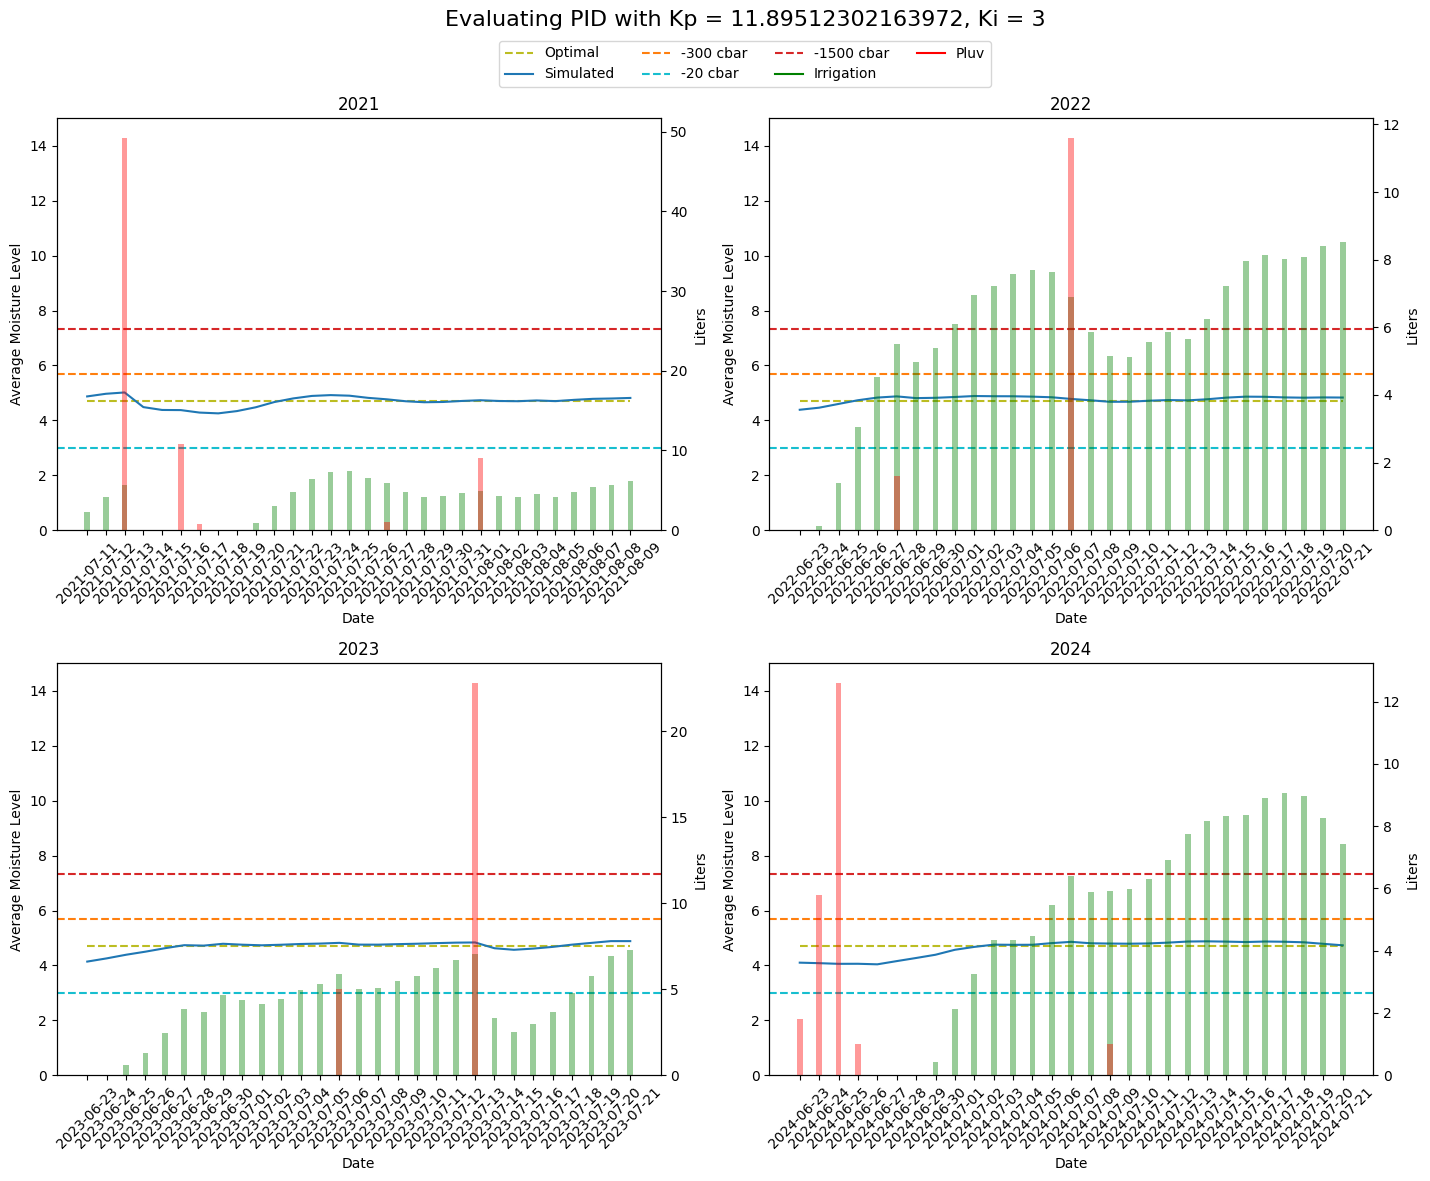

In [9]:
print("Best case scenario with Errano soil")
plot_automl_conf_result("/home/results/errano_soil/run_Kp11.895123021639721_ki3_statistics.csv")

Worst case scenario with Errano soil


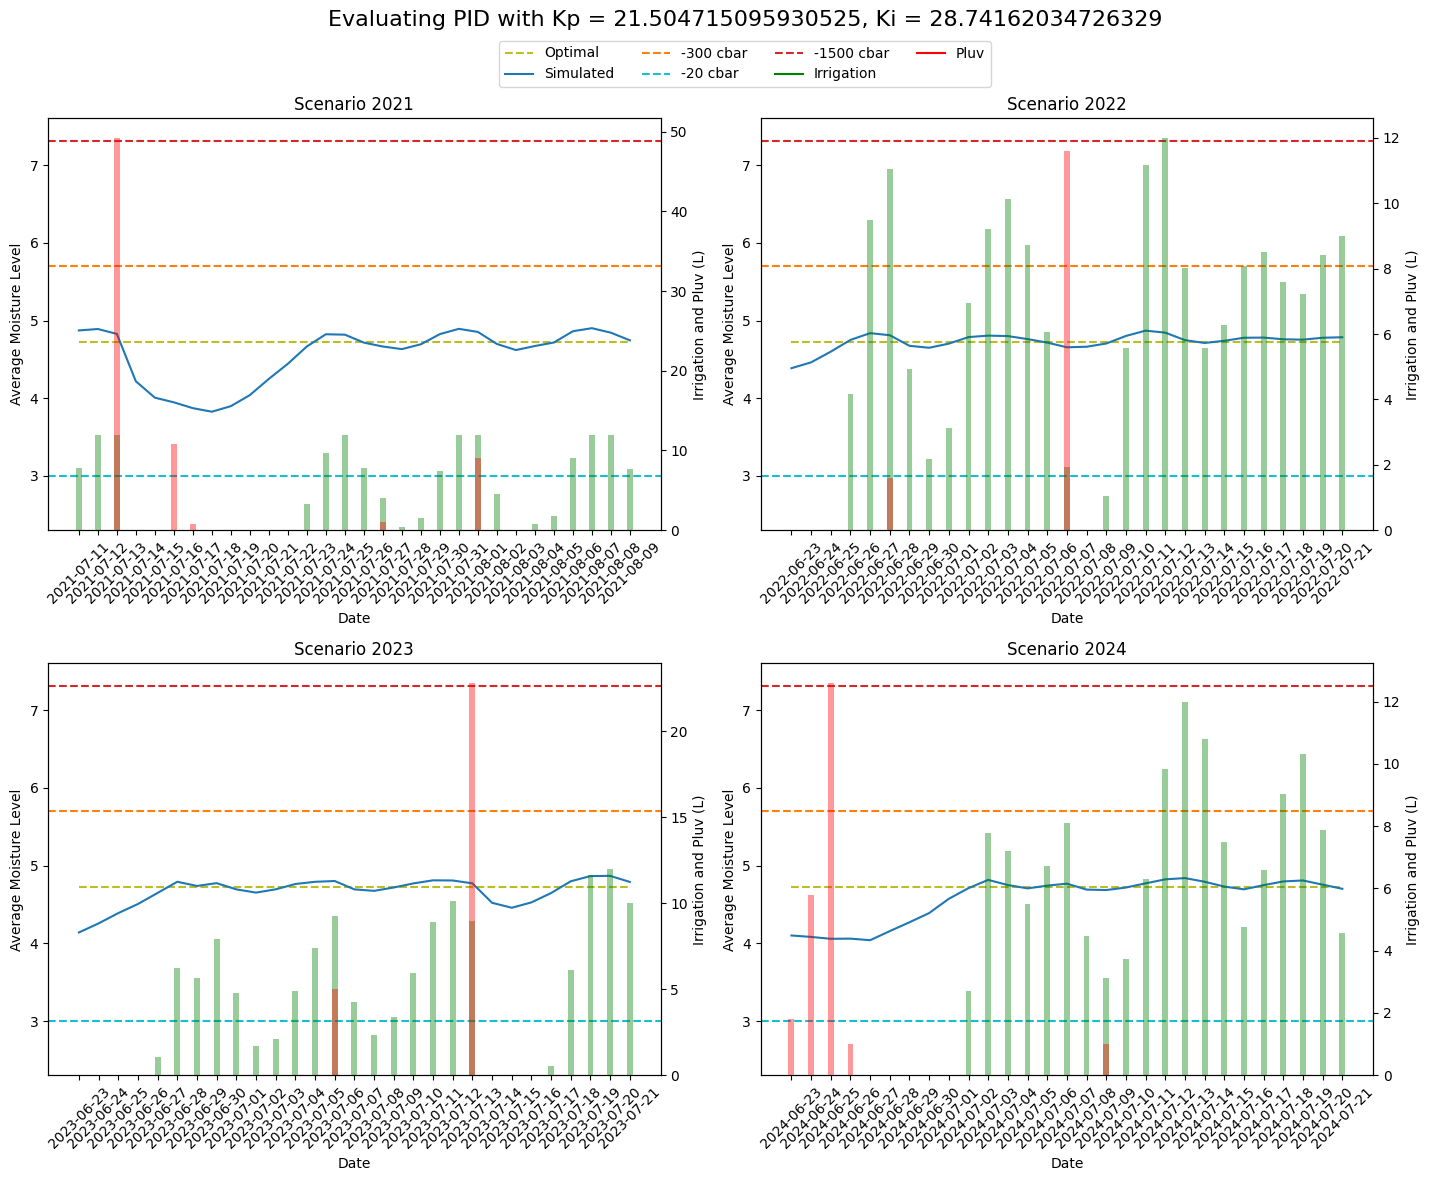

In [5]:
print("Worst case scenario with Errano soil")
plot_automl_conf_result("/home/results/errano_soil/run_Kp21.504715095930525_ki28.741620347263286_statistics.csv")